In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

In [7]:
data=pd.read_csv('./data/Iris.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
data.drop("Id",axis=1)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


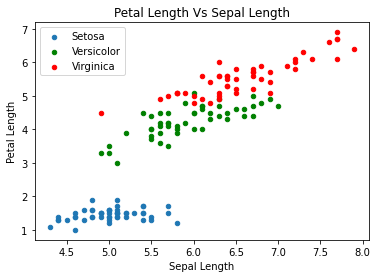

In [73]:
graph = data[data.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='PetalLengthCm', label='Setosa')
data[data.Species == 'Iris-versicolor'].plot(kind='scatter',color='green', x='SepalLengthCm', y='PetalLengthCm', label='Versicolor', ax=graph)
data[data.Species == 'Iris-virginica'].plot(kind='scatter',color='red', x='SepalLengthCm', y='PetalLengthCm', label='Virginica', ax=graph)

graph.set_xlabel('Sepal Length')
graph.set_ylabel('Petal Length')
graph.set_title('Petal Length Vs Sepal Length')
graph=plt.gcf()
plt.show()

In [74]:
data.drop("Id", axis=1, inplace = True)

X = data.iloc[:, 0: 4].values
y = data.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print("training set shape ",X_train.shape)
print("testing set shape ",X_test.shape)

sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

training set shape  (105, 4)
testing set shape  (45, 4)


In [75]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print("Accuracy is ",metrics.accuracy_score(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

Accuracy is  0.9777777777777777
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

